Some typical NumPy 'random' functions:

In [1]:
import numpy as np

# To generate a random float values between 0 and 1 (exclusive)
print(np.random.rand(3, 2)) # Creates a 3 x 2 matrix of random float values between 0 and 1 (exclusive)

# To generate random float values from standard normal distribution (mean = 0 and std = 1)
print(np.random.randn(5)) # Generates 5 random float values from standard normal distribution

# To generate random integer values within a range of values
print(np.random.randint(1, 100, 10)) # Generates 10 random integer values between 1 and 100 (exclusive)

# To randomly select an element from a given list of elements
print(np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9], size=3)) # Three random numbers from the given array will be chosen

# To generate a random sample of values from a normally distributed with a specified mean and standard deviation
print(np.random.normal(loc=0, scale=1, size=10)) # 10 random values will be generated from a normally distributed data where 0 (loc) is the mean and 1 (scale) is the standard deviation

# To set a seed for a random number generation to ensure you get the same results later as well
print(np.random.seed(42)) # This ensures that any random numbers generated in the program are same every time you run the program. The seed value '42' can be any other value

[[0.05036421 0.77031555]
 [0.5270047  0.66162867]
 [0.28032925 0.22183814]]
[-0.55657093  1.41210528 -0.17669013  1.00459236 -0.71394261]
[94 97 96 71 78 27 45  2 49 94]
[1 1 2]
[-0.05685112 -1.21004578  0.98183143 -0.05173386 -0.71265813  0.38822305
  1.27160677 -0.28439551 -1.30510717  0.15072574]
None


AIM #1: Generate a very large dataset
1. Generate a dataset of 1 million random data items between 1 and 100 items using only pandas
2. Generate a dataset of 1 million random data items between 1 and 100 using only NumPy
3. Calculate the time it takes for both the above operations. 
    3.1. Import the 'time' module, and use the time() function to calculate current time
    3.2. Which one is faster and why?

In [2]:
import pandas as pd
import numpy as np
import time

start_time = time.time()
pandas_dataset = pd.DataFrame(np.random.randint(1, 101, size=(1000000, 1)), columns=['Random Data'])
end_time = time.time()

print(f"Time taken by pandas: {end_time - start_time:.4f} seconds")


# aim_1_numpy.py
import numpy as np
import time

start_time = time.time()
numpy_dataset = np.random.randint(1, 101, size=1000000)
end_time = time.time()

print(f"Time taken by NumPy: {end_time - start_time:.4f} seconds")

Time taken by pandas: 0.0113 seconds
Time taken by NumPy: 0.0111 seconds


AIM #2: Basic statistics
For the given dataset on sleep health and lifestyle, do the following
1. Using only pandas, load the dataset, calculate mean 'Sleep Duration', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate' and 'Daily Steps'.
2. Do the same as in Step 1 using only NumPy
3. Using only pandas, first calculate correlation (across only the numerical variables), and then separate correlation between...
    Sleep duration and Age
    Sleep duration and Heart rate
    Sleep duration and Daily steps
4. Using only NumPy, do the same as Step 3
5. Using pandas only, calculate standard deviation for 'Sleep Duration'. 
6. Usiong NumPy only, calculate standard deviation for 'Sleep Duration'. 
7. Calculate the time difference between using pandas and NumPy, right from the step of loading the dataset to the final standard deviation step. 
    5.1. Which one is faster and why?

In [3]:
import pandas as pd
import time

start_time = time.time()
sleep_data_pandas = pd.read_csv('sleep_health.csv')

# Calculate means
mean_sleep_duration_pandas = sleep_data_pandas['Sleep Duration'].mean()
mean_systolic_bp_pandas = sleep_data_pandas['Systolic blood pressure'].mean()
mean_diastolic_bp_pandas = sleep_data_pandas['Diastolic blood pressure'].mean()
mean_heart_rate_pandas = sleep_data_pandas['Heart Rate'].mean()
mean_daily_steps_pandas = sleep_data_pandas['Daily Steps'].mean()

# Calculate correlations (only on numerical columns)
numerical_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
                 'Stress Level', 'Systolic blood pressure', 'Diastolic blood pressure',
                 'Heart Rate', 'Daily Steps']
correlation_matrix_pandas = sleep_data_pandas[numerical_cols].corr() 
correlation_sleep_age_pandas = correlation_matrix_pandas.loc['Sleep Duration', 'Age']
correlation_sleep_hr_pandas = correlation_matrix_pandas.loc['Sleep Duration', 'Heart Rate']
correlation_sleep_steps_pandas = correlation_matrix_pandas.loc['Sleep Duration', 'Daily Steps']

# Calculate standard deviation
std_sleep_duration_pandas = sleep_data_pandas['Sleep Duration'].std()

end_time = time.time()
print(f"Time taken by pandas for stats: {end_time - start_time:.4f} seconds")

Time taken by pandas for stats: 0.0095 seconds


AIM #3: Use suitable plots to visualize the data

1. Using only pandas (and matplotlib/seaborn if necessary) plot the distribution for
    1.1. Age
    1.2. Sleep Duration
    1.3. Quality of Sleep
    1.4. Physical Activity Level
    1.5. Stress Level
    1.6. Heart Rate
2. Using only NumPy, do the same as Step 1. You will need matplotlib for this
3. Using only pandas, use the appropriate plot to
    3.1. See the distribution of 'Sleep Duration' based on 'Quality of Sleep'
    3.2. See the distribution of 'Sleep Duration' based on 'Stress Level'
    3.3. See the distribution of 'Sleep Duration' based on 'Physical Activity Level'
    3.4. See the distribution of 'Sleep Duration' based on 'Occupation'
    3.5. See the distribution of 'Sleep Duration' based on 'BMI'
4. Using only NumPy, do the same as Step 3. You will need matplotlib for this
5. Using only pandas, use a suitable plot to see the relation between
    5.1. Age and Sleep Duration
    5.2. Sleep Duration and Heart Rate
    5.3. Heart Rate and Daily Steps
    5.4. Sleep Duration and Daily Steps
6. Using only NumPy, do the same as Step 5. You will need matplotlib for this 
7. Find the time difference between plotting using only pandas, and plotting using NumPy

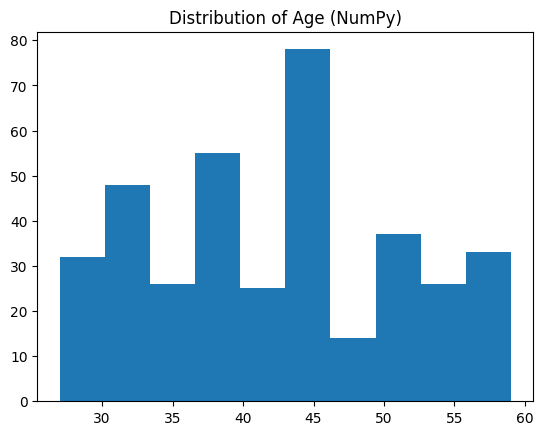

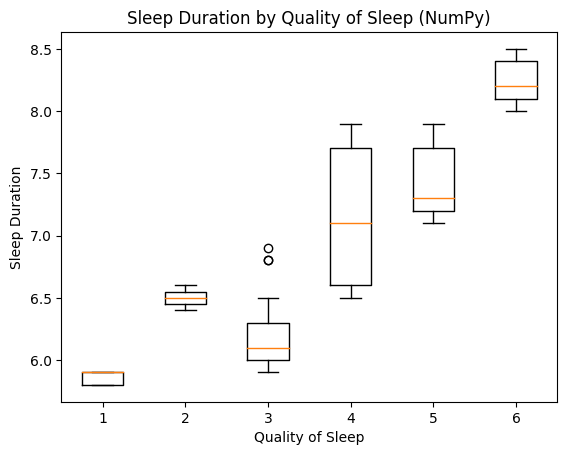

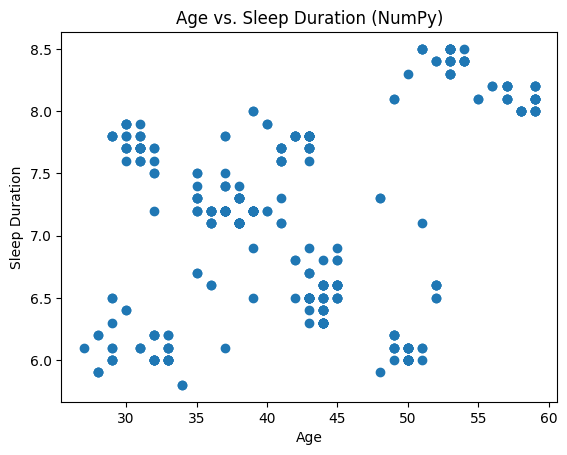

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define converters for non-numerical columns
converters = {1: lambda s: s.decode('utf-8'),  # Gender (string)
              3: lambda s: s.decode('utf-8'),  # Occupation (string)
              9: lambda s: s.decode('utf-8'),  # BMI Category (string)
              13: lambda s: s.decode('utf-8')} # Sleep Disorder (string)

# Load data with converters
data = np.loadtxt('sleep_health.csv', delimiter=',', skiprows=1, converters=converters, 
                  dtype={'names': ('Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 
                                   'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 
                                   'BMI Category', 'Systolic blood pressure', 'Diastolic blood pressure', 
                                   'Heart Rate', 'Daily Steps', 'Sleep Disorder'),
                         'formats': ('i4', 'S10', 'i4', 'S20', 'f4', 'i4', 'i4', 'i4', 'S20', 'f4', 'f4', 'i4', 'i4', 'S20')})


# Distributions
plt.figure()
plt.hist(data['Age']) 
plt.title('Distribution of Age (NumPy)')


# Sleep Duration by various factors
sleep_duration_by_quality = [data['Sleep Duration'][data['Quality of Sleep'] == i] for i in np.unique(data['Quality of Sleep'])]
plt.figure()
plt.boxplot(sleep_duration_by_quality)
plt.title('Sleep Duration by Quality of Sleep (NumPy)')
plt.xlabel('Quality of Sleep')
plt.ylabel('Sleep Duration')


# Relations between variables
plt.figure()
plt.scatter(data['Age'], data['Sleep Duration']) 
plt.title('Age vs. Sleep Duration (NumPy)')
plt.xlabel('Age')
plt.ylabel('Sleep Duration')



plt.show()

AIM #4: Other possible plotting

1. Think of other possible plots to show some interesting distribution and relations. Do this using both pandas and NumPy



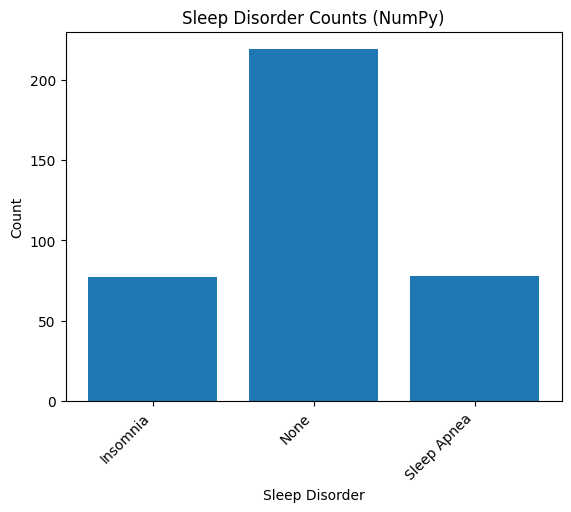

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define converters for non-numerical columns
converters = {1: lambda s: s.decode('utf-8'),  # Gender (string)
              3: lambda s: s.decode('utf-8'),  # Occupation (string)
              9: lambda s: s.decode('utf-8'),  # BMI Category (string)
              13: lambda s: s.decode('utf-8')} # Sleep Disorder (string)

# Load data with converters
data = np.loadtxt('sleep_health.csv', delimiter=',', skiprows=1, converters=converters, 
                  dtype={'names': ('Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 
                                   'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 
                                   'BMI Category', 'Systolic blood pressure', 'Diastolic blood pressure', 
                                   'Heart Rate', 'Daily Steps', 'Sleep Disorder'),
                         'formats': ('i4', 'S10', 'i4', 'S20', 'f4', 'i4', 'i4', 'i4', 'S20', 'f4', 'f4', 'i4', 'i4', 'S20')})

# Example: Bar plot of Sleep Disorder counts
unique_disorders, counts = np.unique(data['Sleep Disorder'], return_counts=True)
plt.figure()
plt.bar(unique_disorders, counts)
plt.title('Sleep Disorder Counts (NumPy)')
plt.xlabel('Sleep Disorder')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability


plt.show()